In [1]:
#Imports
#DS Basics
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#Helpers
%matplotlib inline

#Estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

#Model Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report



#Cross Validation
from sklearn.model_selection import train_test_split

#Data
rawData = pd.read_csv('credit2.csv')

#Creating Dummies for Data
credit = pd.get_dummies(rawData)
credit.head()

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default
0,1.0,20000,1,24,2,2,-1,-1,-2,-2,...,0,0,1,0,0,0,0,1,1,0
1,2.0,120000,2,26,-1,2,0,0,0,2,...,0,2000,1,0,0,0,0,1,1,0
2,3.0,90000,2,34,0,0,0,0,0,0,...,1000,5000,1,0,0,0,0,1,0,1
3,4.0,50000,1,37,0,0,0,0,0,0,...,1069,1000,1,0,0,0,0,1,0,1
4,5.0,50000,1,57,-1,0,-1,0,0,0,...,689,679,0,1,0,0,0,1,0,1


In [2]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      30000 non-null  float64
 1   LIMIT_BAL                               30000 non-null  int64  
 2   MARRIAGE                                30000 non-null  int64  
 3   AGE                                     30000 non-null  int64  
 4   PAY_0                                   30000 non-null  int64  
 5   PAY_2                                   30000 non-null  int64  
 6   PAY_3                                   30000 non-null  int64  
 7   PAY_4                                   30000 non-null  int64  
 8   PAY_5                                   30000 non-null  int64  
 9   PAY_6                                   30000 non-null  int64  
 10  BILL_AMT1                               30000 non-null  in

In [3]:
########################################## Regression Modeling ########################################################

In [4]:
#Features
XR = credit.iloc[:,2:30]
print('Summary of feature sample')
XR.head()

Summary of feature sample


,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default
0,1,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,1,0,0,0,0,1,1,0
1,2,26,-1,2,0,0,0,2,2682,1725,...,0,2000,1,0,0,0,0,1,1,0
2,2,34,0,0,0,0,0,0,29239,14027,...,1000,5000,1,0,0,0,0,1,0,1
3,1,37,0,0,0,0,0,0,46990,48233,...,1069,1000,1,0,0,0,0,1,0,1
4,1,57,-1,0,-1,0,0,0,8617,5670,...,689,679,0,1,0,0,0,1,0,1


In [5]:
#Dependent Variable
yR = credit['LIMIT_BAL']
print(yR)

0         20000
1        120000
2         90000
3         50000
4         50000
          ...  
29995    220000
29996    150000
29997     30000
29998     80000
29999     50000
Name: LIMIT_BAL, Length: 30000, dtype: int64


In [6]:
#Model
model = LinearRegression(n_jobs = 10)

In [7]:
print(cross_val_score(model, XR, yR, cv=3)) 

[0.35681669 0.38049759 0.33728254]


In [8]:
algosclass = []
algosclass.append(('Random Forest Regressor', RandomForestRegressor()))
algosclass.append(('Linear Regression', LinearRegression()))
algosclass.append(('Support Vector Regression', SVR()))

In [9]:
#Regression
results = []
names = []

for name, model in algosclass:
    result = cross_val_score(model, XR, yR, cv = 3, scoring = 'r2')
    names.append(name)
    results.append(result)
 
#Printing Results
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Regressor 0.4672479657730091
Linear Regression 0.3581989426610847
Support Vector Regression -0.05038589493310345


In [10]:
#Assinging best Model and Training/Testing the Data
X_trainR, X_testR, y_trainR, y_testR = train_test_split(XR, yR, test_size = .3, random_state = 123)

algoR = RandomForestRegressor()
modelRF = algoR.fit(X_trainR, y_trainR)

In [11]:
#Predictions
predictions = modelRF.predict(X_testR)

#Calculating Error in Model
predRsquared = r2_score(y_testR, predictions)
rmse = sqrt(mean_squared_error(y_testR, predictions))

print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.468
RMSE: 93882.331


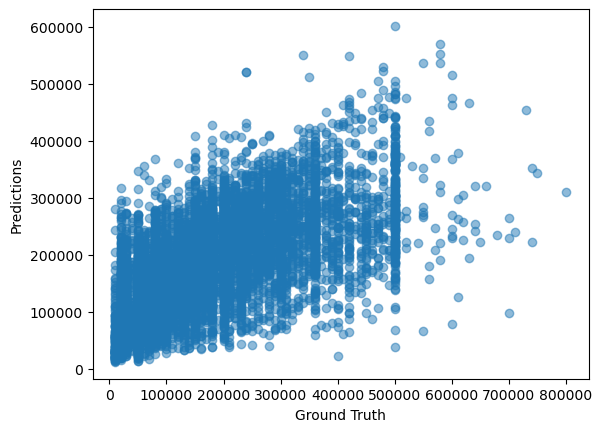

In [12]:
#Plotting the results
plt.scatter(y_testR, predictions, alpha = .5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [13]:
###################################### Classification Modeling (Limit Balance) #################################################

In [14]:
credit.describe()

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,...,4799.387633,5215.502567,0.603733,0.396267,0.352833,0.163900,0.015600,0.467667,0.221200,0.778800
std,8660.398374,129747.661567,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,...,15278.305679,17777.465775,0.489129,0.489129,0.477859,0.370191,0.123924,0.498962,0.415062,0.415062
min,1.000000,10000.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,252.500000,117.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,15000.500000,140000.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1500.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,22500.250000,240000.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4031.500000,4000.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,30000.000000,1000000.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
#Initializing Data Sets for 4 discritizations of Limit Balance
credit_C1 = credit.copy()
credit_C2 = credit.copy()
credit_C3 = credit.copy()
credit_C4 = credit.copy()

In [16]:
#Checking to see Credit Copied correctly
credit_C1.head()

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default
0,1.0,20000,1,24,2,2,-1,-1,-2,-2,...,0,0,1,0,0,0,0,1,1,0
1,2.0,120000,2,26,-1,2,0,0,0,2,...,0,2000,1,0,0,0,0,1,1,0
2,3.0,90000,2,34,0,0,0,0,0,0,...,1000,5000,1,0,0,0,0,1,0,1
3,4.0,50000,1,37,0,0,0,0,0,0,...,1069,1000,1,0,0,0,0,1,0,1
4,5.0,50000,1,57,-1,0,-1,0,0,0,...,689,679,0,1,0,0,0,1,0,1


In [17]:
#Discretizing Limit Balance
category_C1 = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
credit_C1['category_C1']=pd.cut(x=credit_C1['LIMIT_BAL'], bins=[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000], labels = category_C1)

category_C2 = ['0', '1', '2', '3', '4']
credit_C2['category_C2']=pd.cut(x=credit_C2['LIMIT_BAL'], bins=[0,200000,400000,600000, 800000, 1000000], labels = category_C2)

category_C3 = ['0', '1', '2', '3']
credit_C3['category_C3']=pd.cut(x=credit_C3['LIMIT_BAL'], bins=[0, 250000, 500000, 750000, 1000000], labels = category_C3)

category_C4 = ['0', '1']
credit_C4['category_C4']=pd.cut(x=credit_C4['LIMIT_BAL'], bins=[0, 50000, 1000000], labels = category_C4)

#Checking new Data Frame to ensure everything is correct
credit_C1.head()

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default,category_C1
0,1.0,20000,1,24,2,2,-1,-1,-2,-2,...,0,1,0,0,0,0,1,1,0,0
1,2.0,120000,2,26,-1,2,0,0,0,2,...,2000,1,0,0,0,0,1,1,0,1
2,3.0,90000,2,34,0,0,0,0,0,0,...,5000,1,0,0,0,0,1,0,1,0
3,4.0,50000,1,37,0,0,0,0,0,0,...,1000,1,0,0,0,0,1,0,1,0
4,5.0,50000,1,57,-1,0,-1,0,0,0,...,679,0,1,0,0,0,1,0,1,0


In [18]:
#Features
XC = credit
XC = credit.iloc[:,2:30]
print('Summary of feature sample')
XC.info()

Summary of feature sample
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   MARRIAGE                                30000 non-null  int64
 1   AGE                                     30000 non-null  int64
 2   PAY_0                                   30000 non-null  int64
 3   PAY_2                                   30000 non-null  int64
 4   PAY_3                                   30000 non-null  int64
 5   PAY_4                                   30000 non-null  int64
 6   PAY_5                                   30000 non-null  int64
 7   PAY_6                                   30000 non-null  int64
 8   BILL_AMT1                               30000 non-null  int64
 9   BILL_AMT2                               30000 non-null  int64
 10  BILL_AMT3                               30000 non-null  

In [19]:
#Dependent Variable
yC1 = credit_C1['category_C1']
yC2 = credit_C2['category_C2']
yC3 = credit_C3['category_C3']
yC4 = credit_C4['category_C4']

In [20]:
#Assigning an algorithm class array for classification
algosclass_C = []
algosclass_C.append(('Devision Tree Classifier', DecisionTreeClassifier(max_depth = 10)))
algosclass_C.append(('Random Forest Classifier', RandomForestClassifier(max_depth = 10)))

In [21]:
#Chekcing to see what algorithm is more accurate for Limit Balance Discritization 1
results_C1 = []
names_C1 = []

for name_C1, model_C1 in algosclass_C:
    result_C1 = cross_val_score(model_C1, XC, yC1, cv = 3, scoring = 'accuracy')
    names_C1.append(name_C1)
    results_C1.append(result_C1)
 
#Printing Results
for i in range(len(names_C1)):
    print(names_C1[i], results_C1[i].mean())

D:\Purdue_Data_Analytics_Cert\Andaconda\envs\DataScience\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
D:\Purdue_Data_Analytics_Cert\Andaconda\envs\DataScience\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Devision Tree Classifier 0.5479666666666666
Random Forest Classifier 0.5748666666666666


In [22]:
#Chekcing to see what algorithm is more accurate for Limit Balance Discritization 2
results_C2 = []
names_C2 = []

for name_C2, model_C2 in algosclass_C:
    result_C2 = cross_val_score(model_C2, XC, yC2, cv = 3, scoring = 'accuracy')
    names_C2.append(name_C2)
    results_C2.append(result_C2)
 
#Printing Results
for i in range(len(names_C2)):
    print(names_C2[i], results_C2[i].mean())

D:\Purdue_Data_Analytics_Cert\Andaconda\envs\DataScience\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
D:\Purdue_Data_Analytics_Cert\Andaconda\envs\DataScience\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Devision Tree Classifier 0.7233666666666666
Random Forest Classifier 0.7410666666666668


In [23]:
#After running the algorithms through 2 data sets, looks like RFC is the most accurate algorithm, so will use going forward
X_trainC1, X_testC1, y_trainC1, y_testC1 = train_test_split(XC, yC1, test_size = .3, random_state = 123)
X_trainC2, X_testC2, y_trainC2, y_testC2 = train_test_split(XC, yC2, test_size = .3, random_state = 123)
X_trainC3, X_testC3, y_trainC3, y_testC3 = train_test_split(XC, yC3, test_size = .3, random_state = 123)
X_trainC4, X_testC4, y_trainC4, y_testC4 = train_test_split(XC, yC4, test_size = .3, random_state = 123)

algoC = RandomForestClassifier()
modelC1 = algoC.fit(X_trainC1, y_trainC1)
modelC2 = algoC.fit(X_trainC2, y_trainC2)
modelC3 = algoC.fit(X_trainC3, y_trainC3)
modelC4 = algoC.fit(X_trainC4, y_trainC4)

In [24]:
#Predictions
predictionsC1 = modelC1.predict(X_testC1)
predictionsC2 = modelC2.predict(X_testC2)
predictionsC3 = modelC3.predict(X_testC3)
predictionsC4 = modelC4.predict(X_testC4)

#Printing Accuracy
print("Accuracy for Limit Balance Split into 10 Groups:")
print(accuracy_score(y_testC1, predictionsC1))

print("\nAccuracy for Limit Balance Split into 5 Groups:")
print(accuracy_score(y_testC2, predictionsC2))

print("\nAccuracy for Limit Balance Split into 4 Groups:")
print(accuracy_score(y_testC3, predictionsC3))

print("\nAccuracy for Limit Balance Split into 2 Groups:")
print(accuracy_score(y_testC4, predictionsC4))

Accuracy for Limit Balance Split into 10 Groups:
0.46055555555555555

Accuracy for Limit Balance Split into 5 Groups:
0.48

Accuracy for Limit Balance Split into 4 Groups:
0.4398888888888889

Accuracy for Limit Balance Split into 2 Groups:
0.8715555555555555


In [25]:
######################################### Classification Modeling (Defaulting) #################################################

In [26]:
#Features
X_yes = credit
X_yes = credit.iloc[:,1:28]
print('Summary of feature sample')
X_yes.info()

Summary of feature sample
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   LIMIT_BAL                  30000 non-null  int64
 1   MARRIAGE                   30000 non-null  int64
 2   AGE                        30000 non-null  int64
 3   PAY_0                      30000 non-null  int64
 4   PAY_2                      30000 non-null  int64
 5   PAY_3                      30000 non-null  int64
 6   PAY_4                      30000 non-null  int64
 7   PAY_5                      30000 non-null  int64
 8   PAY_6                      30000 non-null  int64
 9   BILL_AMT1                  30000 non-null  int64
 10  BILL_AMT2                  30000 non-null  int64
 11  BILL_AMT3                  30000 non-null  int64
 12  BILL_AMT4                  30000 non-null  int64
 13  BILL_AMT5                  30000 non-null  int64
 

In [27]:
#Dependent Variable
y_yes = credit['default payment next month_default']
print(y_yes)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month_default, Length: 30000, dtype: uint8


In [28]:
#Training and assigning algorithm to data
X_train_yes, X_test_yes, y_train_yes, y_test_yes = train_test_split(X_yes, y_yes, test_size = .3, random_state = 123)

algo_yes = RandomForestClassifier()
model_yes = algo_yes.fit(X_train_yes, y_train_yes)

In [29]:
#Predictions
predictions_yes = model_yes.predict(X_test_yes)

#Printing Accuracy
print("Accuracy for Predictions on whether a borrower will default next payment:")
print(accuracy_score(y_test_yes, predictions_yes))


Accuracy for Predictions on whether a borrower will default next payment:
0.8158888888888889


In [30]:
############################## Modeling with same Dependents but Age Discreteized #############################################

In [31]:
##Regression Modeling
#Discretizing Age into Decades
credit_Age = credit.copy()

Group_Age = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
credit_Age['AGE']=pd.cut(x=credit_Age['AGE'], bins=[0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99], labels = Group_Age)

#Converting AGE column from Category to int
credit_Age['AGE'] = pd.to_numeric(credit_Age['AGE'])

In [32]:
#Features
XRA = credit_Age.iloc[:,2:30]
print('Summary of feature sample')
XRA.head()

Summary of feature sample


,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default
0,1,2,2,2,-1,-1,-2,-2,3913,3102,...,0,0,1,0,0,0,0,1,1,0
1,2,2,-1,2,0,0,0,2,2682,1725,...,0,2000,1,0,0,0,0,1,1,0
2,2,3,0,0,0,0,0,0,29239,14027,...,1000,5000,1,0,0,0,0,1,0,1
3,1,3,0,0,0,0,0,0,46990,48233,...,1069,1000,1,0,0,0,0,1,0,1
4,1,5,-1,0,-1,0,0,0,8617,5670,...,689,679,0,1,0,0,0,1,0,1


In [33]:
#Dependent Variable
yRA = credit['LIMIT_BAL']
print(yRA)

0         20000
1        120000
2         90000
3         50000
4         50000
          ...  
29995    220000
29996    150000
29997     30000
29998     80000
29999     50000
Name: LIMIT_BAL, Length: 30000, dtype: int64


In [34]:
algosclassA = []
algosclassA.append(('Random Forest Regressor', RandomForestRegressor()))
algosclassA.append(('Linear Regression', LinearRegression()))
algosclassA.append(('Support Vector Regression', SVR()))

In [35]:
#Regression With Grouped Age
resultsA = []
namesA = []

for nameA, modelA in algosclassA:
    resultA = cross_val_score(modelA, XRA, yRA, cv = 3, scoring = 'r2')
    namesA.append(nameA)
    resultsA.append(resultA)
 
#Printing Results
for i in range(len(namesA)):
    print(namesA[i], resultsA[i].mean())

Random Forest Regressor 0.44921508432431284
Linear Regression 0.35691389958812675
Support Vector Regression -0.0503859287874043


In [36]:
#Assinging best Model and Training/Testing the Data
X_trainRA, X_testRA, y_trainRA, y_testRA = train_test_split(XRA, yRA, test_size = .3, random_state = 123)

algoA = RandomForestRegressor()
modelRFA = algoA.fit(X_trainRA, y_trainRA)

In [37]:
#Predictions
predictionsA = modelRFA.predict(X_testRA)

#Calculating Error in Model
predRsquaredA = r2_score(y_testRA, predictionsA)
rmseA = sqrt(mean_squared_error(y_testRA, predictionsA))

print('R Squared: %.3f' % predRsquaredA)
print('RMSE: %.3f' % rmseA)

R Squared: 0.454
RMSE: 95065.124


In [38]:
##Classification Modeling Limit Balance
#Initializing Data Sets for 4 discritizations of Limit Balance
credit_C1A = credit_Age.copy()
credit_C2A = credit_Age.copy()
credit_C3A = credit_Age.copy()
credit_C4A = credit_Age.copy()

#Checking the new data frame
credit_C1A.head()

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT5,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default
0,1.0,20000,1,2,2,2,-1,-1,-2,-2,...,0,0,1,0,0,0,0,1,1,0
1,2.0,120000,2,2,-1,2,0,0,0,2,...,0,2000,1,0,0,0,0,1,1,0
2,3.0,90000,2,3,0,0,0,0,0,0,...,1000,5000,1,0,0,0,0,1,0,1
3,4.0,50000,1,3,0,0,0,0,0,0,...,1069,1000,1,0,0,0,0,1,0,1
4,5.0,50000,1,5,-1,0,-1,0,0,0,...,689,679,0,1,0,0,0,1,0,1


In [39]:
#Discretizing Limit Balance
category_C1A = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
credit_C1A['category_C1A']=pd.cut(x=credit_C1A['LIMIT_BAL'], bins=[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000], labels = category_C1A)

category_C2A = ['0', '1', '2', '3', '4']
credit_C2A['category_C2A']=pd.cut(x=credit_C2A['LIMIT_BAL'], bins=[0,200000,400000,600000, 800000, 1000000], labels = category_C2A)

category_C3A = ['0', '1', '2', '3']
credit_C3A['category_C3A']=pd.cut(x=credit_C3A['LIMIT_BAL'], bins=[0, 250000, 500000, 750000, 1000000], labels = category_C3A)

category_C4A = ['0', '1']
credit_C4A['category_C4A']=pd.cut(x=credit_C4A['LIMIT_BAL'], bins=[0, 50000, 1000000], labels = category_C4A)

#Checking new Data Frame to ensure everything is correct
credit_C1A.head()

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT6,SEX_female,SEX_male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,default payment next month_default,default payment next month_not default,category_C1A
0,1.0,20000,1,2,2,2,-1,-1,-2,-2,...,0,1,0,0,0,0,1,1,0,0
1,2.0,120000,2,2,-1,2,0,0,0,2,...,2000,1,0,0,0,0,1,1,0,1
2,3.0,90000,2,3,0,0,0,0,0,0,...,5000,1,0,0,0,0,1,0,1,0
3,4.0,50000,1,3,0,0,0,0,0,0,...,1000,1,0,0,0,0,1,0,1,0
4,5.0,50000,1,5,-1,0,-1,0,0,0,...,679,0,1,0,0,0,1,0,1,0


In [40]:
#Features
XCA = credit_Age
XCA = credit_Age.iloc[:,2:30]
print('Summary of feature sample')
XCA.info()

Summary of feature sample
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   MARRIAGE                                30000 non-null  int64
 1   AGE                                     30000 non-null  int64
 2   PAY_0                                   30000 non-null  int64
 3   PAY_2                                   30000 non-null  int64
 4   PAY_3                                   30000 non-null  int64
 5   PAY_4                                   30000 non-null  int64
 6   PAY_5                                   30000 non-null  int64
 7   PAY_6                                   30000 non-null  int64
 8   BILL_AMT1                               30000 non-null  int64
 9   BILL_AMT2                               30000 non-null  int64
 10  BILL_AMT3                               30000 non-null  

In [41]:
#Dependent Variable
yC1A = credit_C1A['category_C1A']
yC2A = credit_C2A['category_C2A']
yC3A = credit_C3A['category_C3A']
yC4A = credit_C4A['category_C4A']

In [42]:
#After running the algorithms through 2 data sets, looks like RFC is the most accurate algorithm, so will use going forward
X_trainC1A, X_testC1A, y_trainC1A, y_testC1A = train_test_split(XCA, yC1A, test_size = .3, random_state = 123)
X_trainC2A, X_testC2A, y_trainC2A, y_testC2A = train_test_split(XCA, yC2A, test_size = .3, random_state = 123)
X_trainC3A, X_testC3A, y_trainC3A, y_testC3A = train_test_split(XCA, yC3A, test_size = .3, random_state = 123)
X_trainC4A, X_testC4A, y_trainC4A, y_testC4A = train_test_split(XCA, yC4A, test_size = .3, random_state = 123)

algoA = RandomForestClassifier()
modelC1A = algoA.fit(X_trainC1A, y_trainC1A)
modelC2A = algoA.fit(X_trainC2A, y_trainC2A)
modelC3A = algoA.fit(X_trainC3A, y_trainC3A)
modelC4A = algoA.fit(X_trainC4A, y_trainC4A)

In [43]:
#Predictions
predictionsC1A = modelC1A.predict(X_testC1A)
predictionsC2A = modelC2A.predict(X_testC2A)
predictionsC3A = modelC3A.predict(X_testC3A)
predictionsC4A = modelC4A.predict(X_testC4A)

#Printing Accuracy
print("Accuracy for Limit Balance Split into 10 Groups and Age split into decades:")
print(accuracy_score(y_testC1A, predictionsC1A))

print("\nAccuracy for Limit Balance Split into 5 Groups and Age split into decades:")
print(accuracy_score(y_testC2A, predictionsC2A))

print("\nAccuracy for Limit Balance Split into 4 Groups and Age split into decades:")
print(accuracy_score(y_testC3A, predictionsC3A))

print("\nAccuracy for Limit Balance Split into 2 Groups and Age split into decades:")
print(accuracy_score(y_testC4A, predictionsC4A))

Accuracy for Limit Balance Split into 10 Groups and Age split into decades:
0.4538888888888889

Accuracy for Limit Balance Split into 5 Groups and Age split into decades:
0.47588888888888886

Accuracy for Limit Balance Split into 4 Groups and Age split into decades:
0.43577777777777776

Accuracy for Limit Balance Split into 2 Groups and Age split into decades:
0.8642222222222222


In [44]:
##Classification Modeling Defaulting
#Features
X_yesA = credit_Age
X_yesA = credit_Age.iloc[:,1:28]
print('Summary of feature sample')
X_yesA.info()

Summary of feature sample
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   LIMIT_BAL                  30000 non-null  int64
 1   MARRIAGE                   30000 non-null  int64
 2   AGE                        30000 non-null  int64
 3   PAY_0                      30000 non-null  int64
 4   PAY_2                      30000 non-null  int64
 5   PAY_3                      30000 non-null  int64
 6   PAY_4                      30000 non-null  int64
 7   PAY_5                      30000 non-null  int64
 8   PAY_6                      30000 non-null  int64
 9   BILL_AMT1                  30000 non-null  int64
 10  BILL_AMT2                  30000 non-null  int64
 11  BILL_AMT3                  30000 non-null  int64
 12  BILL_AMT4                  30000 non-null  int64
 13  BILL_AMT5                  30000 non-null  int64
 

In [45]:
#Dependent Variable
y_yesA = credit_Age['default payment next month_default']
print(y_yesA)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month_default, Length: 30000, dtype: uint8


In [46]:
#Training and assigning algorithm to data
X_train_yesA, X_test_yesA, y_train_yesA, y_test_yesA = train_test_split(X_yesA, y_yesA, test_size = .3, random_state = 123)

algo_yesA = RandomForestClassifier()
model_yesA = algo_yesA.fit(X_train_yesA, y_train_yesA)

In [47]:
#Predictions
predictions_yesA = model_yesA.predict(X_test_yesA)

#Printing Accuracy
print("Accuracy for Predictions on whether a borrower will default next payment and Age split into decades:")
print(accuracy_score(y_test_yesA, predictions_yesA))

Accuracy for Predictions on whether a borrower will default next payment and Age split into decades:
0.8133333333333334
